In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [7]:
tf.__version__

'2.9.0'

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=.2,
    shear_range=.2,
    horizontal_flip=True,
)
training_set = train_datagen.flow_from_directory(
    'face_classification',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)
test_set = train_datagen.flow_from_directory(
    'face_classification',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)


Found 164 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [21]:
# CNN MIMARISININ OLUSTURULMASI
cnn = tf.keras.Sequential()

In [23]:
#convulation
cnn.add(
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3])
)
#pooling
cnn.add(
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2) # stride = adim sayisi
)
#2.convulation
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#Flattening 
cnn.add(
    tf.keras.layers.Flatten()
)

#Full Connection
cnn.add(
    tf.keras.layers.Dense(units=128,activation='relu')
)

#Cikis Katmani  Output Layer
cnn.add(
    tf.keras.layers.Dense(units=1,activation='sigmoid')
)

In [25]:
#Derleme Islemi 
cnn.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)


In [31]:
# Train

cnn.fit(x=training_set,validation_data=test_set,epochs=50)

Epoch 1/50
6/6 [==============================] - 3s 581ms/step - loss: 0.4796 - accuracy: 0.7439 - val_loss: 0.4910 - val_accuracy: 0.7500
Epoch 2/50
6/6 [==============================] - 3s 516ms/step - loss: 0.4737 - accuracy: 0.7805 - val_loss: 0.4845 - val_accuracy: 0.7256
Epoch 3/50
6/6 [==============================] - 3s 527ms/step - loss: 0.4635 - accuracy: 0.7378 - val_loss: 0.4516 - val_accuracy: 0.7927
Epoch 4/50
6/6 [==============================] - 3s 579ms/step - loss: 0.4433 - accuracy: 0.7988 - val_loss: 0.4220 - val_accuracy: 0.7744
Epoch 5/50
6/6 [==============================] - 3s 532ms/step - loss: 0.4057 - accuracy: 0.7744 - val_loss: 0.4239 - val_accuracy: 0.7622
Epoch 6/50
6/6 [==============================] - 3s 470ms/step - loss: 0.4285 - accuracy: 0.7500 - val_loss: 0.3970 - val_accuracy: 0.8110
Epoch 7/50
6/6 [==============================] - 3s 505ms/step - loss: 0.3795 - accuracy: 0.8293 - val_loss: 0.3854 - val_accuracy: 0.8354
Epoch 8/50
6/6 [====

In [65]:
import numpy as np
from keras.utils import load_img, img_to_array

test_image = load_img('face_classification/happy_person_face/1566247441_4f49f3c7a4.jpg', target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'sad'
else:
    prediction = 'happy'


1/1 [==============================] - 0s 13ms/step


In [67]:
print(prediction)

happy


(-0.5, 499.5, 328.5, -0.5)

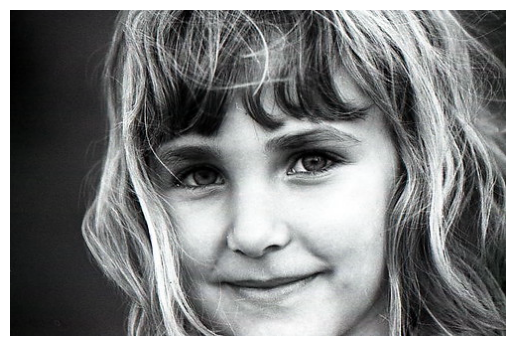

In [77]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('face_classification/happy_person_face/1566247441_4f49f3c7a4.jpg')
plt.imshow(img)
plt.axis('off')